In [1]:
import pandas as pd
import numpy as np
import random
import os

In [2]:
train = pd.read_csv('train_3.csv')
test = pd.read_csv('test_3.csv')

In [3]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

# 독립변수(X), 종속변수(y)로 나누기
train_x = train.drop(columns=['ID', '풍속 (m/s)'], axis = 1)
train_y = train['풍속 (m/s)']

test_x = test.drop(columns=['ID'])

# 데이터 인코딩
le = LabelEncoder()
le = le.fit(train_x['측정 시간대'])
train_x['측정 시간대'] = le.transform(train_x['측정 시간대'])
test_x['측정 시간대'] = le.transform(test_x['측정 시간대'])

# 회귀 모델 정의
dt_clf = DecisionTreeRegressor(random_state=11) 

# 모델 학습
dt_clf.fit(train_x , train_y) 

# 예측
dt_pred = dt_clf.predict(test_x) 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36581 entries, 0 to 36580
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36581 non-null  object 
 1   월               36581 non-null  int64  
 2   일               36581 non-null  int64  
 3   측정 시간대          36581 non-null  object 
 4   섭씨 온도(°⁣C)      36581 non-null  float64
 5   절대 온도(K)        36581 non-null  float64
 6   이슬점 온도(°C)      36581 non-null  float64
 7   상대 습도 (%)       36581 non-null  float64
 8   대기압(mbar)       36581 non-null  float64
 9   포화 증기압(mbar)    36581 non-null  float64
 10  실제 증기압(mbar)    36581 non-null  float64
 11  증기압 부족량(mbar)   36581 non-null  float64
 12  수증기 함량 (g/kg)   36581 non-null  float64
 13  공기 밀도 (g/m**3)  36581 non-null  float64
 14  풍향 (deg)        36581 non-null  float64
 15  풍속 (m/s)        36581 non-null  float64
dtypes: float64(12), int64(2), object(2)
memory usage: 4.5+ MB


공기 밀도 (g/m**3)\
풍향 (deg)

In [6]:
train.columns

Index(['ID', '월', '일', '측정 시간대', '섭씨 온도(°⁣C)', '절대 온도(K)', '이슬점 온도(°C)',
       '상대 습도 (%)', '대기압(mbar)', '포화 증기압(mbar)', '실제 증기압(mbar)',
       '증기압 부족량(mbar)', '수증기 함량 (g/kg)', '공기 밀도 (g/m**3)', '풍향 (deg)',
       '풍속 (m/s)'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt

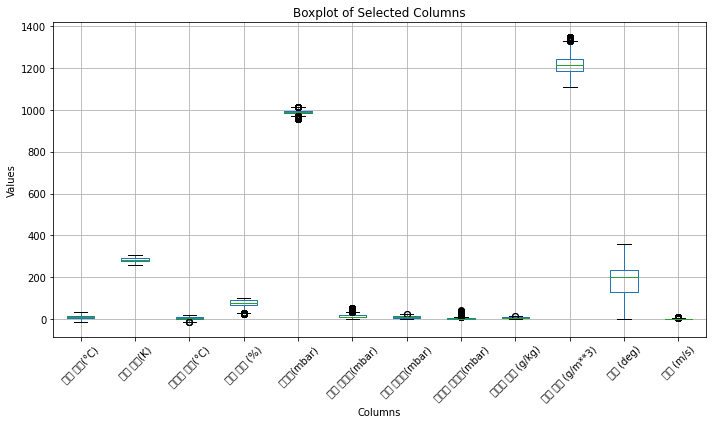

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# train 데이터프레임이 적절히 정의되어 있다고 가정
# train = pd.read_csv("train.csv")

# 첫 번째, 두 번째, 세 번째 열을 제외한 열들을 선택
selected_columns = train.columns[3:]

# 선택된 열들을 가진 새로운 데이터프레임 생성
selected_data = train[selected_columns]

# 박스 플롯 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
selected_data.boxplot()  # 박스 플롯 그리기
plt.title('Boxplot of Selected Columns')  # 그래프 제목 설정
plt.xlabel('Columns')  # x축 레이블 설정
plt.ylabel('Values')  # y축 레이블 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)  # 그리드 추가
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()  # 그래프 출력


In [9]:
# Normalization 혹은 Standardrization이 필요한 칼럼을 확인한 후 전처리를 진행해보세요.

from sklearn.preprocessing import StandardScaler

# '공기 밀도 (g/m**3)'열과 '풍향 (deg)'열만 선택
selected_columns = ['공기 밀도 (g/m**3)', '풍향 (deg)']

# 선택된 열들에 대한 데이터 추출
selected_data = train[selected_columns]

# StandardScaler를 사용하여 선택된 열들을 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=selected_columns)

# 기존 데이터프레임에 표준화된 데이터 열을 추가
train[selected_columns] = scaled_df

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36581 entries, 0 to 36580
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36581 non-null  object 
 1   월               36581 non-null  int64  
 2   일               36581 non-null  int64  
 3   측정 시간대          36581 non-null  object 
 4   섭씨 온도(°⁣C)      36581 non-null  float64
 5   절대 온도(K)        36581 non-null  float64
 6   이슬점 온도(°C)      36581 non-null  float64
 7   상대 습도 (%)       36581 non-null  float64
 8   대기압(mbar)       36581 non-null  float64
 9   포화 증기압(mbar)    36581 non-null  float64
 10  실제 증기압(mbar)    36581 non-null  float64
 11  증기압 부족량(mbar)   36581 non-null  float64
 12  수증기 함량 (g/kg)   36581 non-null  float64
 13  공기 밀도 (g/m**3)  36581 non-null  float64
 14  풍향 (deg)        36581 non-null  float64
 15  풍속 (m/s)        36581 non-null  float64
dtypes: float64(12), int64(2), object(2)
memory usage: 4.5+ MB


In [11]:
# train과 test셋을 분리하여 rmse로 에러를 평가해보세요.


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 예시로 사용할 데이터를 생성합니다.
# 아래 코드는 실제 데이터를 사용하는 것이 아니라 예시를 위한 가상의 데이터입니다.
# 실제 데이터를 사용할 경우 해당 데이터를 불러와야 합니다.
# 여기서는 특징과 타겟을 각각 X와 y에 할당하는 예시를 제공합니다.
X = train.drop(['ID','월','일','측정 시간대'], axis=1)  # 특징들
y = train['풍속 (m/s)']  # 타겟

# train과 test 데이터로 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델을 정의하고 학습시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측을 수행합니다.
predictions = model.predict(X_test)

# RMSE를 계산합니다.
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)


RMSE: 1.1127962148868694e-15


In [ ]:
# PyCaret에서 성능이 좋은 모델을 비교해서 선택해보세요.


from pycaret.regression import *
import pandas as pd

# 데이터 불러오기

# PyCaret의 setup 함수를 사용하여 환경 설정
# target 파라미터에는 타겟 변수의 이름을 입력합니다.
reg_setup = setup(train, target='풍속 (m/s)')

# PyCaret의 compare_models 함수를 사용하여 여러 모델을 비교
best_model = compare_models(fold=5, sort='RMSE')

# 선택된 최적의 모델을 확인
print(best_model)

# 최적의 모델을 튜닝 (옵션)

# 튜닝된 모델을 사용하여 예측
# 예측할 데이터가 있다면 predict_model 함수를 사용하여 예측할 수 있습니다.


,Description,Value
0,Session id,1974
1,Target,풍속 (m/s)
2,Target type,Regression
3,Original data shape,"(36581, 16)"
4,Transformed data shape,"(36581, 19)"
5,Transformed train set shape,"(25606, 19)"
6,Transformed test set shape,"(10975, 19)"
7,Numeric features,13
8,Categorical features,2
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:00:43
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.5256,0.5654,0.7518,0.7646,0.2390,0.4132,0.4420
en,Elastic Net,1.0574,2.0314,1.4252,0.1544,0.4261,0.9466,0.3200
huber,Huber Regressor,1.0239,2.0538,1.4331,0.1451,0.4183,0.8363,0.3720
lasso,Lasso Regression,1.0698,2.0834,1.4433,0.1328,0.4308,0.9661,0.3300
llar,Lasso Least Angle Regression,1.0698,2.0835,1.4433,0.1328,0.4308,0.9661,0.3280
omp,Orthogonal Matching Pursuit,1.0849,2.1566,1.4684,0.1024,0.4363,0.9747,0.3240
ridge,Ridge Regression,1.1614,2.4014,1.5495,0.0005,0.4664,1.0905,0.3160
et,Extra Trees Regressor,1.1617,2.4028,1.5500,-0.0001,0.4665,1.0909,0.4900
lr,Linear Regression,1.1618,2.4031,1.5501,-0.0002,0.4666,1.0910,0.6860
br,Bayesian Ridge,1.1618,2.4031,1.5501,-0.0002,0.4666,1.0910,0.3240


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [16]:
# PyCaret에서 나온 성능이 좋은 모델을 Optuna를 통해 하이퍼 파라미터 최적활를 진행하세요.


import optuna
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# # 데이터 불러오기
# data = pd.read_csv('train.csv')  # 파일 경로를 적절하게 수정해야 합니다.

# # 타겟 변수와 특성 데이터 분리
# X = data.drop(columns=['target_variable_name'])
# y = data['target_variable_name']

# # 훈련 세트와 검증 세트로 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # K 최근접 이웃 모델에 대한 하이퍼파라미터 검색 범위 설정
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    
    # 모델 생성 및 학습
    model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
    model.fit(X_train, y_train)
    
    # 검증 세트에 대한 예측
    y_pred = model.predict(X_valid)
    
    # 검증 세트에 대한 RMSE 계산
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    
    return rmse

# Optuna를 사용하여 하이퍼파라미터 최적화
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 출력
print("Best trial:")
best_trial = study.best_trial
print("  Value: RMSE = {:.4f}".format(best_trial.value))
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))


[I 2024-03-28 20:27:11,078] A new study created in memory with name: no-name-00344757-fe71-4098-8fd0-c1f8daf146db
[I 2024-03-28 20:27:11,238] Trial 0 finished with value: 0.5534046253251211 and parameters: {'n_neighbors': 15, 'weights': 'uniform'}. Best is trial 0 with value: 0.5534046253251211.
[I 2024-03-28 20:27:11,351] Trial 1 finished with value: 0.376508570820968 and parameters: {'n_neighbors': 4, 'weights': 'distance'}. Best is trial 1 with value: 0.376508570820968.
[I 2024-03-28 20:27:11,458] Trial 2 finished with value: 0.37092827264345585 and parameters: {'n_neighbors': 3, 'weights': 'distance'}. Best is trial 2 with value: 0.37092827264345585.
[I 2024-03-28 20:27:11,606] Trial 3 finished with value: 0.45225704654877136 and parameters: {'n_neighbors': 12, 'weights': 'distance'}. Best is trial 2 with value: 0.37092827264345585.
[I 2024-03-28 20:27:11,858] Trial 4 finished with value: 0.645698179220662 and parameters: {'n_neighbors': 47, 'weights': 'distance'}. Best is trial 2 

Best trial:
  Value: RMSE = 0.3709
  Params: 
    n_neighbors: 3
    weights: distance


In [17]:
### 앙상블 기법 중 부스팅을 활용해서 성능을 올려보세요.(AdaBoostRegressor)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터 불러오기

# 모델 생성 및 학습
model = AdaBoostRegressor()
model.fit(X_train, y_train)

# 검증 세트에 대한 예측
y_pred = model.predict(X_valid)

# 검증 세트에 대한 RMSE 계산
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print("Validation RMSE:", rmse)


Validation RMSE: 0.14080009612347158
